# Simple Data Analysis and Logistic Regression Classification 

## The Pima Indian diabetes

We want to predict whether a vector of text features corresponds to a patient having diabetes

### Attribute Information:

Patterns have 8 numeric features plus a 0-1 class label.

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test 
3. Diastolic blood pressure (mm Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 


More details and actual data available in https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import os, sys
import sklearn as skl
import seaborn as sns

np.set_printoptions(precision=3)

## Carga de datos

In [3]:
f_name = 'D:\GoogleDrive\Cursos\datasets\pima.csv'
df_pima = pd.read_csv(f_name, sep=';')

print( "nFilas: %d\tnColumnas: %d\n" % (df_pima.shape[0], df_pima.shape[1]) )
print( "Columnas:\t", np.array(df_pima.columns) )

nFilas: 768	nColumnas: 9

Columnas:	 ['numPregnant' 'glucose' 'bloodPress' 'skinThick' 'insulin' 'massIndex'
 'pedigree' 'age' 'label']


## Visualización y correlaciones

Boxplots, histogramas y visualizaciones sobre valores normalizados

In [4]:
########## basic feature stats

df_pima.describe()

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


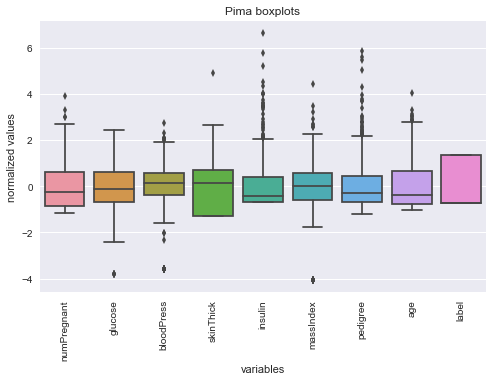

In [5]:
########## feature boxplots 

df_pima_normalizado = (df_pima - df_pima.mean()) / df_pima.std() #normalizar para tener rangos uniformes en histogramas

plt.figure( figsize=(8, 5))
plt.title("Pima boxplots")
sns.set_style("white")
bx_plot = sns.boxplot(data=df_pima_normalizado)
#bx_plot = sns.boxplot(data=df_housing)
plt.xticks(rotation=90)
plt.xlabel("variables")
plt.ylabel("normalized values")
plt.show()

### Histograms and scatterplots

Plot histograms of groups of 5 variables plus target.

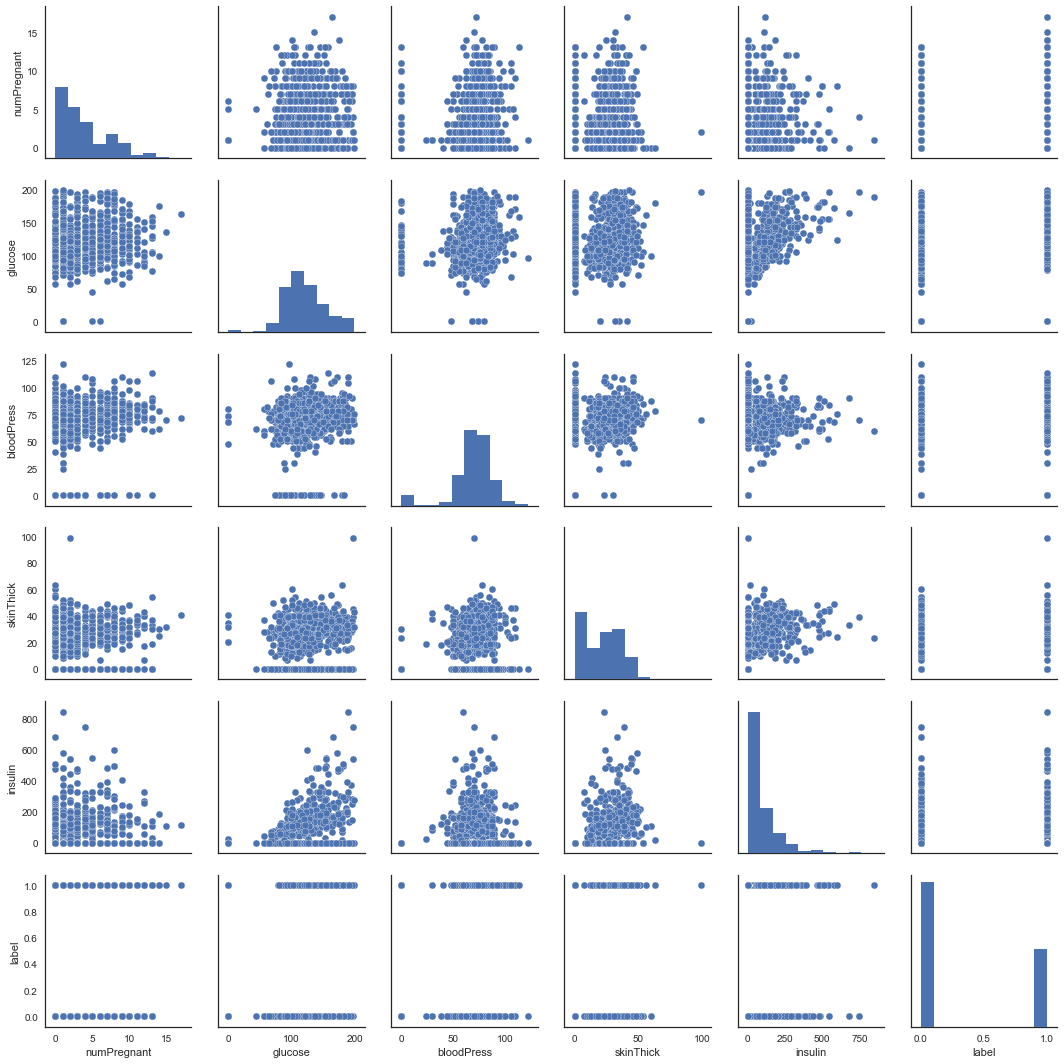

In [6]:
########## feature histograms over the entire sample

vars_pima   = df_pima.columns[ : -1]
target_pima = df_pima.columns[-1]

pair_plot = sns.pairplot( df_pima[ list(vars_pima[ : 5]) + [target_pima] ] )
plt.show()

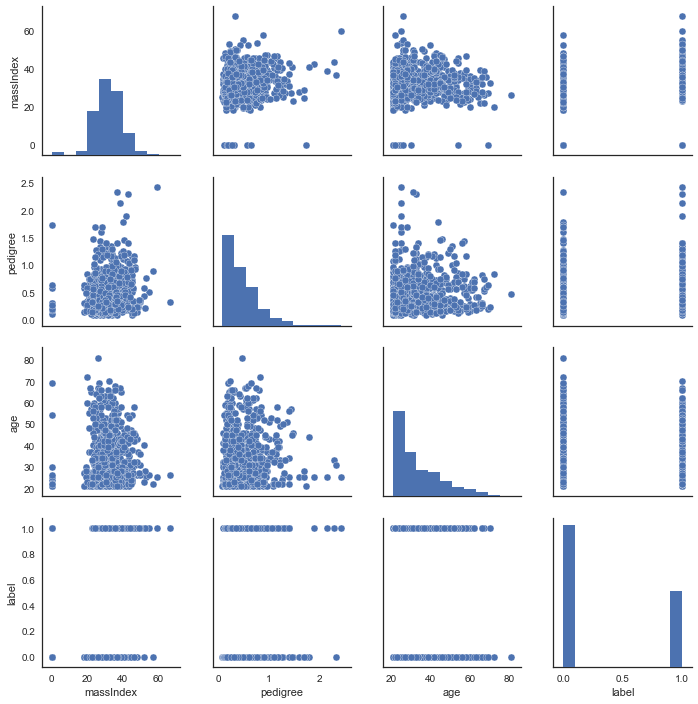

In [7]:
pair_plot = sns.pairplot( df_pima[ list(vars_pima[ 5 :  10]) + [target_pima] ] )
plt.show()

### Histogramas positivos-negativos

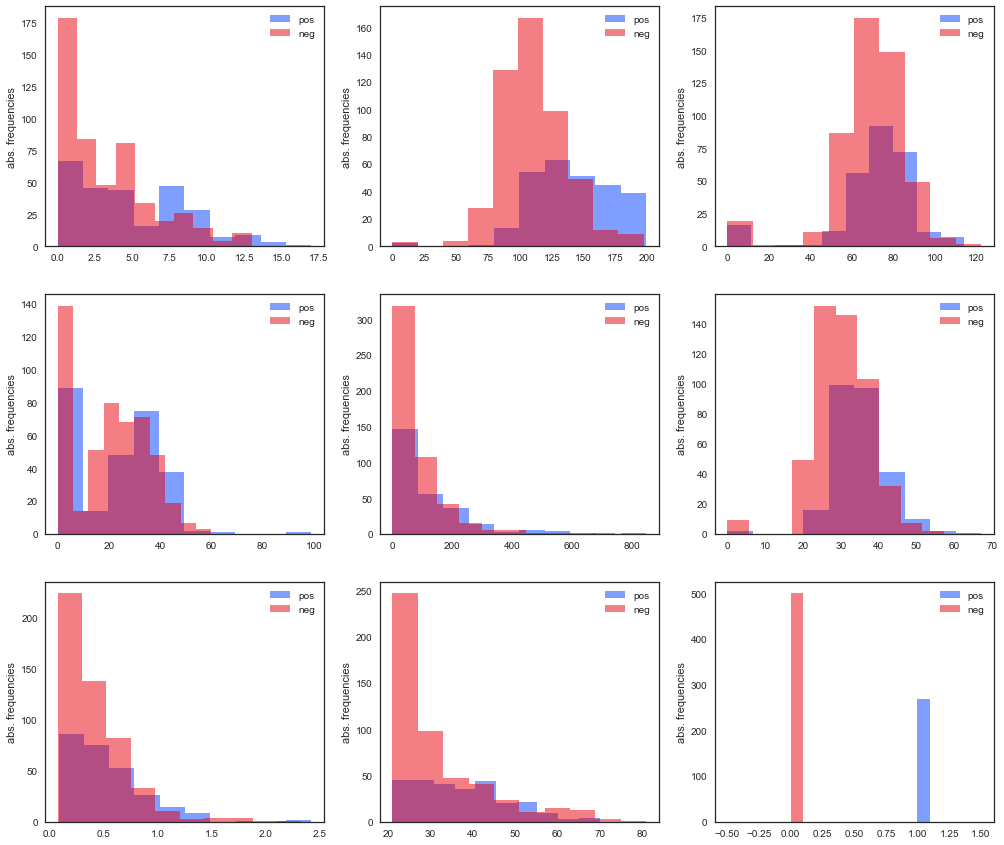

In [8]:
#sns.set(color_codes=True)
sns.set_color_codes("bright")
sns.set_style("white")

num_columns = 3
num_rows = int( np.ceil( len(df_pima.columns)/num_columns ) )
bins = None

plt.figure( figsize=(17, 5*num_rows))
plt.title("Pima boxplots")

for i, var in enumerate (df_pima.columns):
    pos = np.where( df_pima[target_pima] == 1)[0]
    neg = np.where( df_pima[target_pima] == 0)[0]

    plt.subplot(num_rows, num_columns, i+1)
    
    plt.hist( df_pima[ var ].iloc[pos], bins=bins, color='b', label='pos', alpha=0.5)
    plt.hist( df_pima[ var ].iloc[neg], bins=bins, color='r', label='neg', alpha=0.5)

    #sns.distplot( df_pima[ var ].iloc[pos], bins=bins, kde=False, color='b', label='pos')
    #sns.distplot( df_pima[ var ].iloc[neg], bins=bins, kde=False, color='r', label='neg')
    
    plt.ylabel("abs. frequencies")
    plt.legend(loc='best')

plt.show()

## Correlations

In [9]:
df_pima.corr().round(decimals=3)

,numPregnant,glucose,bloodPress,skinThick,insulin,massIndex,pedigree,age,label
numPregnant,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
bloodPress,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
skinThick,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
massIndex,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
pedigree,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
label,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


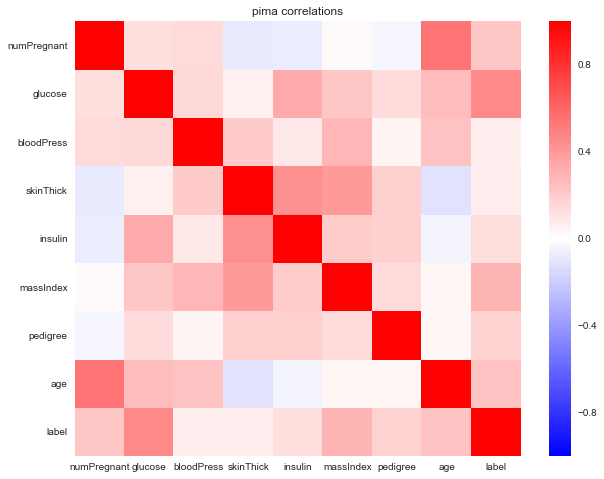

In [10]:
# correlation heatmap
plt.figure( figsize=(10, 8))
plt.title('pima correlations')
_ = sns.heatmap(df_pima.corr().values, vmin=-1., vmax=1., cmap='bwr', 
                xticklabels=list(df_pima.columns),
                yticklabels=list(df_pima.columns))

### Most correlated features

In [11]:
########## rank features according to correlation with targets

print( ( df_pima.corr()['label'].abs().sort_values(ascending=False).T) )

label          1.000000
glucose        0.466581
massIndex      0.292695
age            0.238356
numPregnant    0.221898
pedigree       0.173844
insulin        0.130548
skinThick      0.074752
bloodPress     0.065068
Name: label, dtype: float64


## Logistic Regression

Just getting started ...

We first run a single model over all data and then explore CV.

In all case we use l2 penalty, the newton-cg solver and a penalty C=1.

**Important**: C penalizes the cost function and not the l2 penalty

b: -0.858805


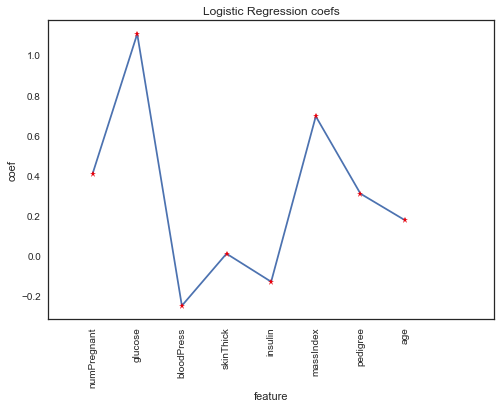

In [12]:
########## build a first log regression model

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

x = df_pima[ df_pima.columns[:-1] ]
y = df_pima[ df_pima.columns[-1] ]

# scale data
std_sc = StandardScaler()
x = std_sc.fit_transform(x)

# the default regularization value is C=1.
logr_m =  LogisticRegression()

# fit sobre la muestra completa, sin split train-test
logr_m.fit(x, y)

print("b: %f" % logr_m.intercept_)

nticks_coefs = len(df_pima.columns)-1
plt.title('Logistic Regression coefs')
plt.xlabel('feature')
plt.ylabel('coef')
plt.xlim(-1, nticks_coefs+1)
#plt.ylim(-1., 1.)
plt.xticks(range(nticks_coefs), vars_pima, rotation='vertical')
_ = plt.plot(logr_m.coef_.reshape( x.shape[1] ), '-', logr_m.coef_.reshape( x.shape[1] ), 'r*')
#_ = plt.plot( (logr_m.coef_).reshape( x.shape[1] ), '*', nticks_coefs*[0], '-' )

In [13]:
########## accuracy, precision, recall of the classifier obtained

from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

y_pred = logr_m.predict(x)

acc    = accuracy_score(y, y_pred)
recall = recall_score(y, y_pred)
prec   = precision_score(y, y_pred) 

print("acc: %.3f\trecall: %.3f\tprecision: %.3f" % (acc, recall, prec))

print("\nconfusion matrix:\n", confusion_matrix(y, y_pred))

acc: 0.784	recall: 0.586	precision: 0.741

confusion matrix:
 [[445  55]
 [111 157]]


In [14]:
########## cv values of accuracy, precision, recall

from sklearn.model_selection import cross_val_score

logr_m =  LogisticRegression()

# accuracies
acc_cv_scores = cross_val_score(logr_m, x, y, cv=10, scoring='accuracy')
print ("acc_cv_scores:\n\t", acc_cv_scores)
print("\n\tcv acc mean: %.3f\n" % (acc_cv_scores.mean()))

# recall
recall_cv_scores = cross_val_score(logr_m, x, y, cv=10, scoring='recall')
print ("recall_cv_scores:\n\t", recall_cv_scores)
print("\n\tcv recall mean: %.3f\n" % (recall_cv_scores.mean()))

# precision
prec_cv_scores = cross_val_score(logr_m, x, y, cv=10, scoring='precision')
print ("precision_cv_scores:\n\t", prec_cv_scores)
print("\n\tcv precisison mean: %.3f\n" % (prec_cv_scores.mean()))

acc_cv_scores:
	 [ 0.727  0.766  0.805  0.714  0.753  0.753  0.805  0.805  0.75   0.829]

	cv acc mean: 0.771

recall_cv_scores:
	 [ 0.593  0.519  0.63   0.556  0.444  0.519  0.63   0.593  0.5    0.615]

	cv recall mean: 0.560

precision_cv_scores:
	 [ 0.615  0.737  0.773  0.6    0.75   0.7    0.773  0.8    0.684  0.842]

	cv precisison mean: 0.727



### Tuning `C` in Logistic Regression

We select the log regression regularization parameter `C` by CV using sklearn randomized search

**Note**: `C` penalizes $\|w\|^2$ as `1./alpha/num_patterns`

In [15]:
########## find best regularization parameter C = 1./alpha
# First iteration to find an initial alpha
from sklearn.model_selection import KFold, GridSearchCV

num_patterns, _ = x.shape

alpha_max = 5.e-2
n_alphas_to_try = 100
l_C = [10.**k for k in range(-6, 10)]
parameters = {'C': l_C}
#list (1. / np.random.uniform(0., alpha_max, n_alphas_to_try))
#parameters = {'C': list(1./alpha_sample/num_patterns)}

n_folds = 10

logr_m = LogisticRegression()

# we use GridSearchCV which uses stratified folds
logr_C_search = GridSearchCV(logr_m, param_grid=parameters, cv=n_folds, scoring='accuracy', n_jobs=2, verbose=1)
logr_C_search.fit(x, y)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=2)]: Done 160 out of 160 | elapsed:    6.2s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=2,
       param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0, 10000000.0, 100000000.0, 1000000000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

best C: 1.0000	best alpha: 0.001302 acc: 0.771


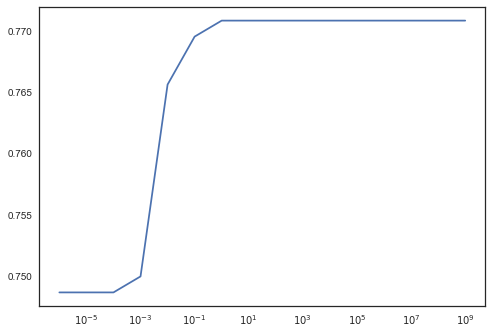

In [16]:
best_C = logr_C_search.best_params_['C']
best_alpha_C = 1./ best_C / num_patterns
print("best C: %.4f\tbest alpha: %.6f" % (best_C, best_alpha_C), 
      "acc: %.3f" % logr_C_search.best_score_) 

df_logr_C_search = pd.DataFrame.from_dict(logr_C_search.cv_results_)

plt.xscale('log')
_ = plt.plot( df_logr_C_search['param_C'], logr_C_search.cv_results_['mean_test_score'])

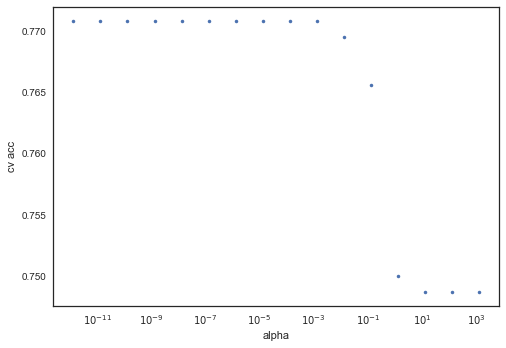

In [17]:
########## plot cv values with respect to alpha in logscale

df_logr_C_search = pd.DataFrame.from_dict(logr_C_search.cv_results_)

plt.xlabel('alpha')
plt.ylabel('cv acc')
plt.xscale('log')
_ = plt.plot( 1./df_logr_C_search['param_C']/num_patterns, df_logr_C_search['mean_test_score'], '.')

In [18]:
########## CV accuracy, recall and precision of best model

logr_m =  LogisticRegression(C=best_C)

# accuracies
acc_cv_scores = cross_val_score(logr_m, x, y, cv=10, scoring='accuracy')
print ("acc_cv_scores:\n\t", acc_cv_scores)
print("\n\tcv acc mean: %.3f\n" % (acc_cv_scores.mean()))

# recall
recall_cv_scores = cross_val_score(logr_m, x, y, cv=10, scoring='recall')
print ("recall_cv_scores:\n\t", recall_cv_scores)
print("\n\tcv recall mean: %.3f\n" % (recall_cv_scores.mean()))

# precision
prec_cv_scores = cross_val_score(logr_m, x, y, cv=10, scoring='precision')
print ("precision_cv_scores:\n\t", prec_cv_scores)
print("\n\tcv precisison mean: %.3f\n" % (prec_cv_scores.mean()))

acc_cv_scores:
	 [ 0.727  0.766  0.805  0.714  0.753  0.753  0.805  0.805  0.75   0.829]

	cv acc mean: 0.771

recall_cv_scores:
	 [ 0.593  0.519  0.63   0.556  0.444  0.519  0.63   0.593  0.5    0.615]

	cv recall mean: 0.560

precision_cv_scores:
	 [ 0.615  0.737  0.773  0.6    0.75   0.7    0.773  0.8    0.684  0.842]

	cv precisison mean: 0.727



## Predicting probabilities

In classification we should give class probability estimates rather than labels.

Construir el histograma de probabilidades de las clases positiva y negativa del modelo de regresión logística con un $C$ óptimo.

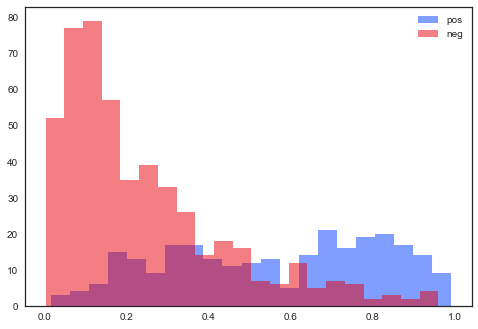

In [19]:
######### plot prob histograms
logr_m =  LogisticRegression(C=best_C)
logr_m.fit(x, y)

p_pred = logr_m.predict_proba(x)[ : , 1]

pos = np.where(y == 1)[0]
neg = np.where(y == 0)[0]

bins = 21

plt.hist( p_pred[pos], bins=bins, color='b', label='pos', alpha=0.5)
plt.hist( p_pred[neg], bins=bins, color='r', label='neg', alpha=0.5)

#sns.distplot( p_pred[pos], bins=bins, kde=False, color='b', label='pos')
#sns.distplot( p_pred[neg], bins=bins, kde=False, color='r', label='neg')
    
plt.legend(loc='best')
plt.show()

El etiquetado 0-1 por default de las predicciones en LogisticRegression se realiza en función de que la probabilidad de fraude predicha sea menor o mayor que un umbral $\theta=0.5$.

A ls vista del histograma obtenido considerar los valores de recall y precision que se obtendrían con valores $\theta= 0.5, 0.6, 0.7, 0.8, 0.9$.

¿Cuál sería el umbral óptimo para optimizar la precision?

In [20]:
######### análisis de umbrales

l_thresholds = [0.5, 0.25]

for thresh in l_thresholds:
    y_pred_thresh = np.zeros( num_patterns ) 
    pos_thresh = np.where(p_pred > thresh)[0]
    y_pred_thresh[pos_thresh] = 1

    print("threshold:", thresh)
    print("\tconfusion matrix\n", confusion_matrix(y, y_pred_thresh) )
    print("\n\taccuracy\t%.3f"   %   accuracy_score(y, y_pred_thresh) )
    print("\trecall\t\t%.3f"     %   recall_score(y, y_pred_thresh) )
    print("\tprecision\t%.3f"    %   precision_score(y, y_pred_thresh) )
    print("\tnum_alertas\t%d\n\n"    %   confusion_matrix(y, y_pred_thresh)[ : , 1 ].sum() )

threshold: 0.5
	confusion matrix
 [[445  55]
 [111 157]]

	accuracy	0.784
	recall		0.586
	precision	0.741
	num_alertas	212


threshold: 0.25
	confusion matrix
 [[320 180]
 [ 41 227]]

	accuracy	0.712
	recall		0.847
	precision	0.558
	num_alertas	407


